| | |
| -- | -- |
| **Nama** | Farrel Augusta Dinata |
| **Kelas** | TI-3H |
| **NIM** | 2341720081 |
| **No. Absen** | 12 |

# Persiapan

In [1]:
!pip install kneed -q

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from annoy import AnnoyIndex
from kneed import KneeLocator
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [3]:
# setup random seed

RANDOM_SEED = 24
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# 1. Data Preprocessing

In [4]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

display(df.head(20))
display(df.describe())
display(df.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

Berdasarkan hasil observasi dataset yang ada menggunakan library dari **Pandas**, dataset terdiri dari 14 kolom dengan 13 kolom fitur dan 1 kolom target. Pada kasus klusterisasi, kolom target tidak diperlukan. Maka dari itu, kolom tersebut bisa di *drop* atau dihapus dari pemrosesan data selanjutnya.

Berdasarka tipe data yang dimiliki, seluruh data sudah bertipe numerik. Mayoritas memiliki tipe data `int64` dan ditambah salah satu data `oldpeak` yang memiliki tipe data `float64`. Dikarenakan data sudah numerik, maka untuk tahapan selanjutnya (preprocessing), tidak diperlukan konversi data menjadi numerik atau biasa disebut dengan encoding data.

## 1.1 Mengatasi Data Kosong (*Missing Values*)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Berdasarkan pengamatan pada dataset yang ada, tidak ditemukan data yang kosong. Dengan demikian tidak diperlukan proses data imputation yang bertujuan untuk mengisi data kosong.

## 1.2 Membuat 1 Fitur Baru

Fitur baru ini bernama `chol_age` yang menunjukkan jumlah perkalian antara kolom `chol`(kadar kolesterol dalam satuan `mg/dl`) dan `age` (usia)

In [6]:
# add new column [CholAge] (cholesterol * age)
df['chol_age'] = df['chol'] * df['age']

display(df['chol_age'].describe())
print('\n')
display(df['chol_age'].head(20))

count     1025.000000
mean     13493.590244
std       4017.462610
min       5916.000000
25%      10660.000000
50%      13053.000000
75%      15860.000000
max      37788.000000
Name: chol_age, dtype: float64

0     11024
1     10759
2     12180
3     12383
4     18228
5     14384
6     18444
7     15895
8     11454
9     15444
10    10579
11    14663
12     7140
13    15198
14    10608
15     7140
16    15708
17    14364
18    12200
19    12238
Name: chol_age, dtype: int64

## 1.3 Normalisasi / Standardisasi

Normalisasi ini bertujuan agar data-data numerik memiliki skala yang sama sehingga tidak ada fitur yang lebih dominan daripada yang lain. Metode yang bisa digunakan untuk normalisasi ini ada banyak. Pemilihan metode normalisasi bergantung pada karakteristik pada dataset yang ada. Salah satu caranya adalah dengan melihat apakah dataset yang ada memiliki outlier atau tidak.

,column,IQR_outliers_count,Zscore_outliers_count,sample_IQR,sample_Z
0,age,0,0,[],[]
1,trestbps,30,7,"[180, 178, 174]","[192, 200, 192]"
2,chol,16,13,"[417, 564, 409]","[417, 564, 409]"
3,thalach,4,4,"[71, 71, 71]","[71, 71, 71]"
4,oldpeak,7,7,"[5.6, 5.6, 6.2]","[5.6, 5.6, 6.2]"
5,chol_age,13,10,"[27105, 37788, 37788]","[27105, 37788, 37788]"


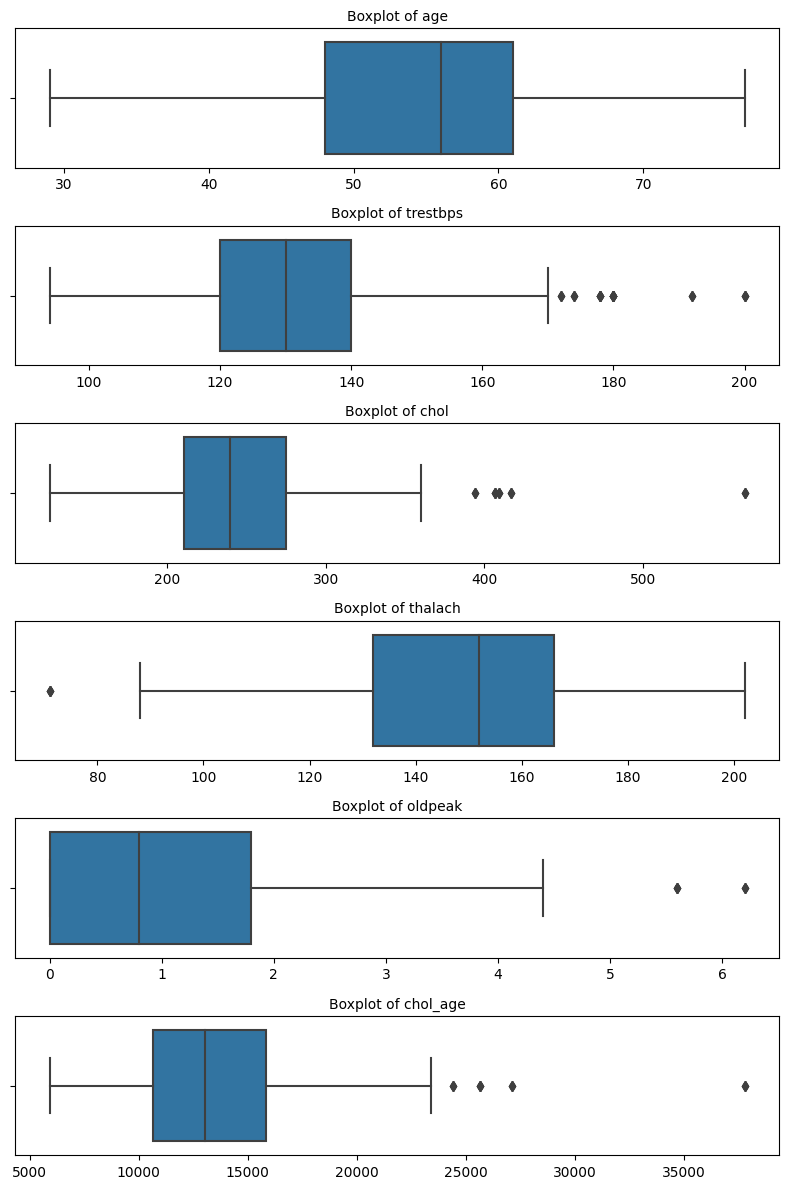

In [7]:
# numeric columns
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "chol_age"]

outlier_summary = []

for col in num_cols:
    # IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
    
    # Z-score method
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    outliers_z = df[z_scores > 3][col]
    
    # Store summary
    outlier_summary.append({
        "column": col,
        "IQR_outliers_count": len(outliers_iqr),
        "Zscore_outliers_count": len(outliers_z),
        "sample_IQR": outliers_iqr.head(3).tolist(),  # first 3 values as example
        "sample_Z": outliers_z.head(3).tolist()
    })

# Convert summary to DataFrame for easy viewing
summary_df = pd.DataFrame(outlier_summary)
display(summary_df)


# Boxplot visualization
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, len(num_cols)*2))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

Berdasarkan karakteristik dataset yang diperoleh, maka metode normalisasi yang tepat adalah menggunakan `StandardScaler` karena dataset masih memiliki outlier yang cukup banyak pada beberapa kolom. Contohnya saja pada kolom `trestBps` dan `chol`. Metode lain seperti `MinMaxScaler` menjadi tidak cocok karena dataset memiliki outlier yang dapat mengganggu pemrosesan selanjutnya.

In [8]:
print('Data sebelum dilakukan proses normalisasi')
display(df[num_cols].head())

print('\nDeskripsi data')
display(df[num_cols].describe())



scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print('\n\nData setelah dilakukan proses normalisasi')
display(df[num_cols].head())

print('\nDeskripsi data')
display(df[num_cols].describe())

Data sebelum dilakukan proses normalisasi


,age,trestbps,chol,thalach,oldpeak,chol_age
0,52,125,212,168,1.0,11024
1,53,140,203,155,3.1,10759
2,70,145,174,125,2.6,12180
3,61,148,203,161,0.0,12383
4,62,138,294,106,1.9,18228



Deskripsi data


,age,trestbps,chol,thalach,oldpeak,chol_age
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,13493.590244
std,9.072290,17.516718,51.59251,23.005724,1.175053,4017.462610
min,29.000000,94.000000,126.00000,71.000000,0.000000,5916.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,10660.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,13053.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,15860.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,37788.000000




Data setelah dilakukan proses normalisasi


,age,trestbps,chol,thalach,oldpeak,chol_age
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,-0.615014
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,-0.681008
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,-0.327130
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,-0.276576
4,0.834359,0.364875,0.930822,-1.874977,0.705408,1.179033



Deskripsi data


,age,trestbps,chol,thalach,oldpeak,chol_age
count,1.025000e+03,1.025000e+03,1025.000000,1.025000e+03,1.025000e+03,1.025000e+03
mean,-3.500723e-16,-6.966785e-16,0.000000,-4.297917e-16,-3.812668e-17,-1.005158e-16
std,1.000488e+00,1.000488e+00,1.000488,1.000488e+00,1.000488e+00,1.000488e+00
min,-2.804866e+00,-2.148237e+00,-2.327054,-3.397080e+00,-9.123291e-01,-1.887084e+00
25%,-7.095548e-01,-6.632165e-01,-0.678724,-7.442713e-01,-9.123291e-01,-7.056627e-01
50%,1.726817e-01,-9.205458e-02,-0.116353,1.255019e-01,-2.311765e-01,-1.097223e-01
75%,7.240794e-01,4.791073e-01,0.562371,7.343432e-01,6.202642e-01,5.893185e-01
max,2.488552e+00,3.906079e+00,6.166694,2.299935e+00,4.366603e+00,6.050154e+00


Melalui proses normalisasi dengan standardisasi (`StandardScaler`), maka nilai **mean** menjadi semakin mendekati $0$ dan **standard deviation** (simpangan baku) menjadi mendekati $1$.

# 2. Klusterisasi

Sebelum melakukan proses utama, yaitu klusterisasi, perlu dilakukan penghapusan data-data yang tidak perlu. Contohnya adalah kolom `target` yang kurang berguna pada kasus klusterisasi ini.

In [9]:
X = df.drop('target', axis=1)
y = df['target']

X.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chol_age
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,-0.615014
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,-0.681008
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,-0.327130
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,-0.276576
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,1.179033
5,0.393241,0,0,-1.805540,0.038784,0,0,-1.179158,0,-0.060888,1,0,2,0.221743
6,0.393241,1,0,-1.005914,1.396233,0,2,-0.396362,0,2.834010,0,3,1,1.232825
7,0.062402,1,0,1.621431,0.833861,0,0,-0.178919,1,-0.231177,1,1,3,0.598035
8,-0.930114,1,0,-0.663216,0.058176,0,0,-0.222407,0,-0.231177,2,0,3,-0.507929
9,-0.047877,1,0,-0.548984,0.775685,0,0,-1.440090,1,1.812281,1,2,2,0.485720


## 2.1 k-Means

### 2.1.1 Menemukan nilai k terbaik

Untuk melakukan proses k-Means, perlu ditentukan nilai k yang paling terbaik. Metode yang bisa dilakukan adalah melalui **Elbow method** dan juga **Silhouette score**.

#### 2.1.1.1 Elbow method

k=1, inertia=9970.3063
k=2, inertia=8044.8650
k=3, inertia=7228.4779
k=4, inertia=6754.2181
k=5, inertia=6347.4037
k=6, inertia=6002.6436
k=7, inertia=5724.1779
k=8, inertia=5507.6895
k=9, inertia=5326.3173
k=10, inertia=5204.2874
k=11, inertia=5010.8023
k=12, inertia=4914.7145
k=13, inertia=4754.9094
k=14, inertia=4622.8161
k=15, inertia=4542.9997
k=16, inertia=4465.2422
k=17, inertia=4346.9914
k=18, inertia=4254.1696
k=19, inertia=4160.8212


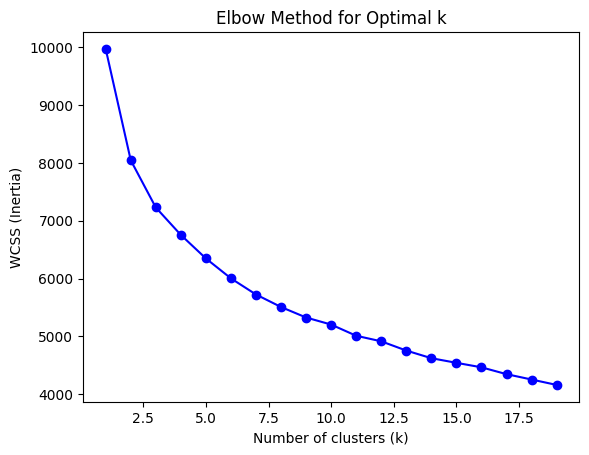


Optimal k (elbow): 6


In [10]:
wcss = []
K_range = range(1, 20)
inertia_list = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED)
    kmeans.fit(X)
    inertia = kmeans.inertia_ # inertia_ = WCSS
    inertia_list.append(inertia)
    print(f"k={k}, inertia={inertia:.4f}")
    wcss.append(inertia)

# Plot the elbow
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Automatically detect elbow
knee = KneeLocator(K_range, inertia_list, curve="convex", direction="decreasing")
print("\nOptimal k (elbow):", knee.knee)

Dengan menggunakan elbow method di atas, grafik cenderung kondisi yang tampak terus menurun tanpa terlihat kondisi yang sudah cukup melandai. Untuk memudahkan pengamatan, maka di sini saya menggunakan dukungan library tambahan untuk mengetahui posisi elbow yang tepat. Berdasarkan library tersebut, didapatkan hasil bahwa elbow berada pada `k=6`. 

#### 2.1.1.2 Silhouette score

k=2, silhouette score=0.1821
k=3, silhouette score=0.1755
k=4, silhouette score=0.1528
k=5, silhouette score=0.1269
k=6, silhouette score=0.1335
k=7, silhouette score=0.1333
k=8, silhouette score=0.1360
k=9, silhouette score=0.1312
k=10, silhouette score=0.1212
k=11, silhouette score=0.1346
k=12, silhouette score=0.1262
k=13, silhouette score=0.1353
k=14, silhouette score=0.1377
k=15, silhouette score=0.1474
k=16, silhouette score=0.1414
k=17, silhouette score=0.1415
k=18, silhouette score=0.1340
k=19, silhouette score=0.1535


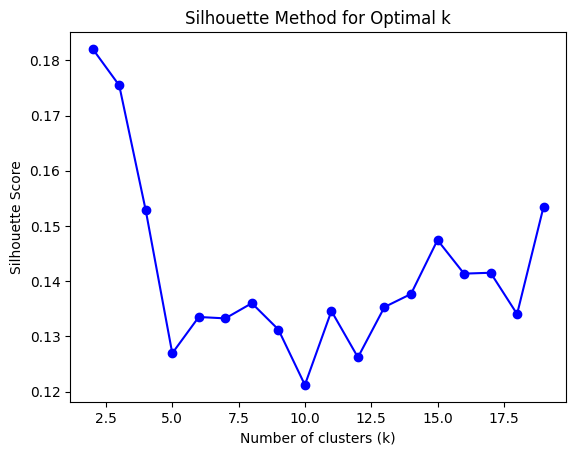

In [11]:
s_scores = []
K_range = range(2, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k={k}, silhouette score={score:.4f}")
    s_scores.append(score)
    
# Plot
plt.plot(K_range, s_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

Berdassarkan metode yang dilakukan dari elbow method, nilai k terbaik terletak pada `k=2`. Pada `k=2`, didapatkan nilai silhouette score tertinggi ($0.1847$)

### 2.1.2 Model training

Proses training dilakukan dengan memanfaatkan library dari library **Scikit-learn** pada modul `sklearn.cluster`. Untuk menggunakannya, maka bisa menambahkan parameter `n_clusters` dengan nilai $6$ dan juga $2$ yang didapat dari proses penentuan `k` sebelumnya (elbow method dan juga silhouette score). Jika dilihat pada data yang sebenarnya, data target hanya terdiri dari 2 data, yaitu $0$ dan $1$. $0$ untuk menunjukkan bahwa orang tersebut tidak terkena penyakit sedangkan $1$ untuk orang yang terkena penyakit. Hasil dari silhouette score sesuai pada data sebenarnya. Penggunaan jumlah kluster 2 ini bisa digunakan untuk memastikan apakah data yang sebelumnya memiliki pola tertentu yang bisa diprediksi. Sedangkan dari hasil elbow method, didapatkan jumlah kluster optimal 6. Ini bisa digunakan juga dengan tujuan untuk melihat pola-pola tersembunyi dari dataset yang ada.

In [12]:
# k from Elbow
k_elbow = 6
kmeans_elbow = KMeans(n_clusters=k_elbow, random_state=RANDOM_SEED)
kmeans_labels_elbow = kmeans_elbow.fit_predict(X)
sil_elbow = silhouette_score(X, kmeans_labels_elbow)

# k from Silhouette
k_sil = 2
kmeans_sil = KMeans(n_clusters=k_sil, random_state=RANDOM_SEED)
kmeans_labels_sil = kmeans_sil.fit_predict(X)
sil_sil = silhouette_score(X, kmeans_labels_sil)

print(f"Elbow k={k_elbow}, Silhouette={sil_elbow:.3f}")
print(f"Silhouette k={k_sil}, Silhouette={sil_sil:.3f}")

Elbow k=6, Silhouette=0.134
Silhouette k=2, Silhouette=0.182


### 2.1.3 Visualisasi

Pada kasus ini, terdapat banyak fitur. Terhitung terdapat $12$ fitur yang digunakan. Untuk memudahkan visualisasi, maka bisa melakukan implementasi **Principal Component Analysis (PCA)**. PCA ini berguna untuk menyederhanakan beberapa fitur yang memiliki korelasi kuat menjadi fitur yang lebih sederhana. Penggunaan PCA ini juga bisa dilakukan untuk visualisasi pada dimensi 2 ataupun 3.

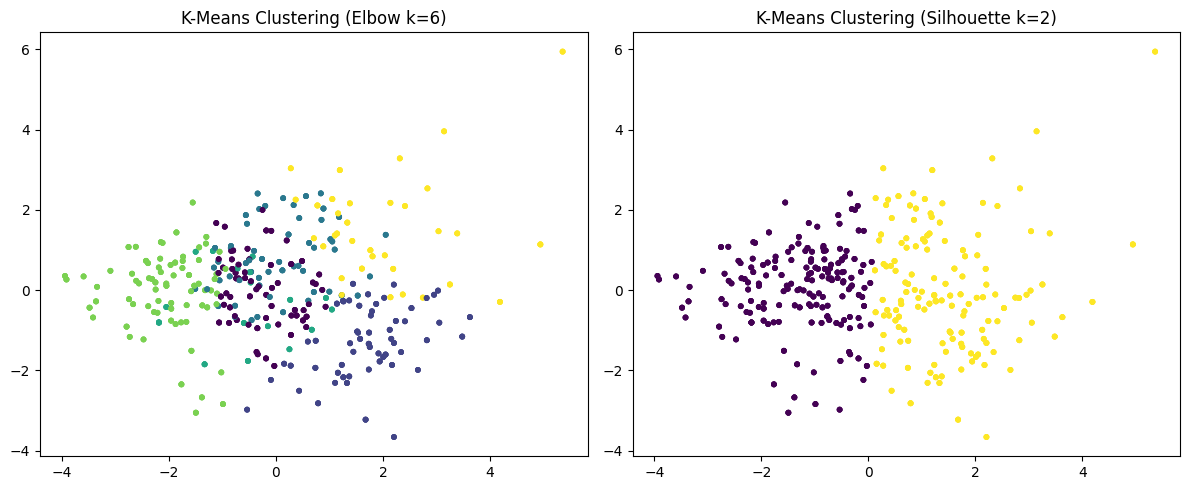

In [13]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Elbow k
axes[0].scatter(
    reduced[:, 0], 
    reduced[:, 1], 
    c=kmeans_labels_elbow, 
    cmap='viridis', 
    s=10  # size of points
)
axes[0].set_title(f"K-Means Clustering (Elbow k={k_elbow})")

# Plot Silhouette k
axes[1].scatter(
    reduced[:, 0], 
    reduced[:, 1], 
    c=kmeans_labels_sil, 
    cmap='viridis', 
    s=10
)
axes[1].set_title(f"K-Means Clustering (Silhouette k={k_sil})")

plt.tight_layout()
plt.show()

### 2.1.4 Pengujian

Pengujian ini dilakukan terkhusus pada data pengujian k-Means dengan jumlah `k=2` yang memiliki jumlah kluster sama pada data yang sebenarnya. Saya ingin menguji apakah pada 2 kluster tersebut terdiri dari data orang tanpa penyakit (0) atau orang dengan penyakit (1) sepenuhnya pada masing-masing kluster.

In [14]:
df_compare = pd.DataFrame({
    'Target': y, 
    'Cluster': kmeans_labels_sil
})

# Cross-tabulation
ct = pd.crosstab(df_compare['Cluster'], df_compare['Target'])
ct

Target,0,1
Cluster,,
0,144,400
1,355,126


In [15]:
if accuracy_score(y, kmeans_labels_sil) < 0.5:
    kmeans_labels_sil_flipped = 1 - kmeans_labels_sil
else:
    kmeans_labels_sil_flipped = kmeans_labels_sil

accuracy = accuracy_score(y, kmeans_labels_sil_flipped)
print(f"Clustering accuracy vs target: {accuracy:.3f}")

Clustering accuracy vs target: 0.737


Pada pengujian akurasi tersebut, didapatkan akurasi sebesar $0.737$ atau $73.7\%$ data telah digrub atau kluster dengan sesuai pada data yang sebenarnya. Hasil ini tidak terlalu tinggi namun juga tidak terlalu rendah.

## 2.2 DBSCAN

### 2.2.1 Konfigurasi Awal DBSCAN

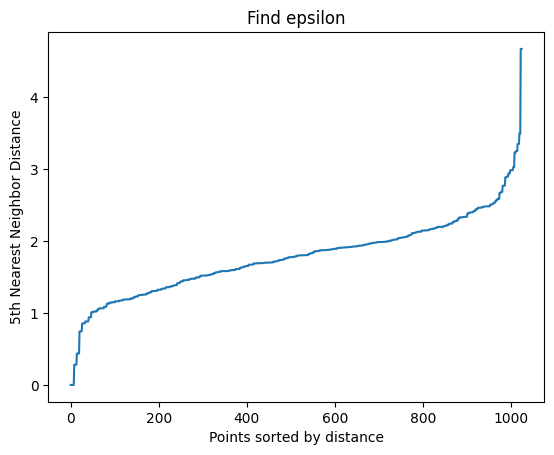


Optimal eps: 4.666116489223395


In [16]:
min_samples = 5

neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances[:, -1])

# Plot
plt.plot(distances)
plt.ylabel("5th Nearest Neighbor Distance")
plt.xlabel("Points sorted by distance")
plt.title("Find epsilon")
plt.show()


# Penentuan nilai epsilon paling optimum secara otomatis
knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
eps_opt = distances[knee.knee]
print("\nOptimal eps:", eps_opt)

Berdasarkan perhitungan epsilon yang paling optimal, ditemukan hasil $4.666116489223395$ yang menjadi titik optimum. Hasil ini bisa dijadikan sebagai input parameter `eps` pada class `DBSCAN` selanjutnya

### 2.2.2 Model training

In [17]:
dbscan = DBSCAN(eps=4.666, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

dbscan_labels

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
score = silhouette_score(df, dbscan_labels)
print("Silhouette Score (DBSCAN):", score)

Silhouette Score (DBSCAN): 0.5422840594663325


### 2.2.3 Visualisasi

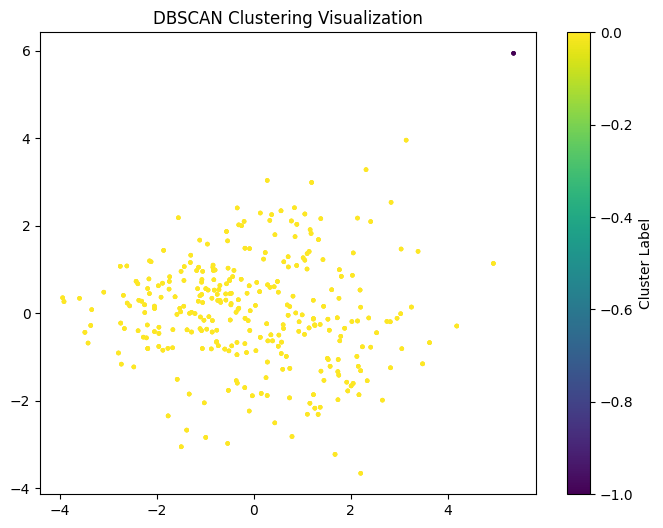

In [19]:
pca_2d = PCA(n_components=2)
reduced_2d = pca_2d.fit_transform(X)

# 2D Plot
plt.figure(figsize=(8, 6))
plt.scatter(
    reduced_2d[:, 0], reduced_2d[:, 1],
    c=dbscan_labels,
    cmap='viridis',
    s=5
)
plt.title("DBSCAN Clustering Visualization")
plt.colorbar(label='Cluster Label')
plt.show()

## 2.3 Perbandingan Hasil

In [20]:
sil_kmeans_1 = silhouette_score(X, kmeans_labels_elbow)
dbi_kmeans_1 = davies_bouldin_score(X, kmeans_labels_elbow)

sil_kmeans_2 = silhouette_score(X, kmeans_labels_sil)
dbi_kmeans_2 = davies_bouldin_score(X, kmeans_labels_sil)

sil_dbscan = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else None
dbi_dbscan = davies_bouldin_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else None

print(f"K-Means 1 (elbow)  → Silhouette: {sil_kmeans_1:.3f}, DBI: {dbi_kmeans_1:.3f}")
print(f"K-Means 2 (silhouette) → Silhouette: {sil_kmeans_2:.3f}, DBI: {dbi_kmeans_2:.3f}")
print(f"DBSCAN   → Silhouette: {sil_dbscan}, DBI: {dbi_dbscan}")

K-Means 1 (elbow)  → Silhouette: 0.134, DBI: 1.842
K-Means 2 (silhouette) → Silhouette: 0.182, DBI: 1.975
DBSCAN   → Silhouette: 0.5471605642488553, DBI: 0.3309490502090705


# 3. Analisis

Berdasarkan hasil eksperimen terbaru, metode **K-Means** dan **DBSCAN** menunjukkan perbedaan yang cukup signifikan dalam klasterisasi dataset *Heart Disease*. Untuk K-Means, dua pendekatan telah dicoba: menggunakan metode **elbow**, yang menghasilkan **k=6**, dan metode **silhouette**, yang menghasilkan **k=2**. Nilai Silhouette Score untuk k=2 adalah 0.182 dengan DBI sebesar 1.975, sedangkan untuk k=6 Silhouette Score sebesar 0.134 dan DBI sebesar 1.842. Pendekatan k=2 ternyata paling sesuai dengan data asli, karena label target hanya terdiri dari dua kelas, yaitu orang yang tidak memiliki penyakit (0) dan orang yang memiliki penyakit (1). Pengujian akurasi menunjukkan bahwa **73,7% data berhasil dikelompokkan sesuai dengan label asli**, yang menunjukkan bahwa K-Means dengan k=2 mampu menangkap struktur utama data meskipun akurasi belum sempurna. Sementara itu, K-Means dengan k=6 dapat digunakan untuk mencoba menemukan **hidden pattern** atau subklaster dalam data yang tidak terlihat dari label target asli.

Metode **DBSCAN** memberikan hasil yang berbeda dengan **Silhouette Score sebesar 0.547** dan **DBI sebesar 0.331**. Nilai Silhouette yang lebih tinggi menunjukkan bahwa titik-titik dalam klaster berada pada posisi yang lebih tepat, dan DBI yang rendah menandakan pemisahan antar klaster yang jelas serta struktur klaster yang stabil. Meskipun DBSCAN tidak disesuaikan secara langsung dengan label target, metode ini tetap berguna untuk mengeksplorasi pola-pola tersembunyi dalam data yang mungkin tidak terdeteksi oleh K-Means.

Secara keseluruhan, meskipun K-Means dengan k=2 paling sesuai untuk menyesuaikan dengan data asli, DBSCAN dan K-Means dengan k=6 tetap memiliki nilai guna dalam **menemukan pola tambahan atau hidden structure** di dalam dataset. Eksperimen ini menekankan bahwa pemilihan metode klasterisasi sebaiknya mempertimbangkan tujuan analisis, apakah untuk **mereplikasi label asli** atau **menemukan pola tersembunyi** dalam data.


# 4. ANN (Approximate Nearest Neighbor)

In [21]:
f = df.shape[1]
index = AnnoyIndex(f, 'euclidean')

# Add each vector into the index
for i, vector in enumerate(df.values):
    index.add_item(i, vector)

# Build the forest
index.build(10)

True

In [22]:
query_index = 10
k = 5 

neighbors, distances = index.get_nns_by_item(
    query_index,
    k,
    include_distances=True
)

print("Query index:", query_index)
print("Nearest neighbors:", neighbors)
print("Distances:", distances)

Query index: 10
Nearest neighbors: [10, 401, 500, 648, 643]
Distances: [0.0, 0.0, 0.0, 0.0, 2.3375353813171387]


# 5. Kesimpulan

Berdasarkan serangkaian percobaan yang telah dilakukan menggunakan metode **K-Means**, **DBSCAN**, dan **Approximate Nearest Neighbor (ANN)** pada dataset *Heart Disease*, dapat disimpulkan beberapa hal mengenai kinerja dan karakteristik masing-masing metode.

Untuk **K-Means**, percobaan dengan dua pendekatan menunjukkan hasil yang bervariasi. Menggunakan metode **silhouette** dengan k=2, yang sesuai dengan jumlah kelas target asli, diperoleh **Silhouette Score sebesar 0.182** dan DBI sebesar 1.975. Pengujian akurasi terhadap label asli menunjukkan bahwa **73,7% data berhasil dikelompokkan sesuai label**, menunjukkan bahwa K-Means mampu menangkap struktur utama data dengan cukup baik. Sementara itu, pendekatan **elbow method** dengan k=6 menghasilkan Silhouette Score 0.134 dan DBI 1.842, yang lebih rendah, namun dapat digunakan untuk mengeksplorasi **hidden pattern** atau subklaster dalam dataset.

Metode **DBSCAN** memberikan hasil yang berbeda dengan **Silhouette Score 0.547** dan DBI 0.331. Nilai Silhouette yang lebih tinggi dan DBI yang lebih rendah menunjukkan bahwa klaster yang terbentuk lebih jelas, stabil, dan memiliki pemisahan yang lebih baik antar klaster dibandingkan K-Means. Hal ini menunjukkan bahwa DBSCAN sangat berguna untuk menemukan pola atau struktur tersembunyi dalam data, meskipun tidak secara langsung menyesuaikan dengan label asli.

Hasil dari **ANN** menunjukkan bahwa titik dengan indeks 10 memiliki beberapa tetangga dengan jarak yang sangat kecil bahkan nol, yaitu `[10, 401, 500, 648, 643]`, dengan jarak masing-masing `[0.0, 0.0, 0.0, 0.0, 2.3375]`. Ini mengindikasikan adanya kemiripan fitur yang kuat di antara titik-titik tersebut. Jika dibandingkan dengan label klaster K-Means atau DBSCAN, ANN dapat membantu memvalidasi konsistensi dan kemiripan antar titik dalam klaster atau mengeksplorasi tetangga yang sangat mirip, yang berguna untuk analisis lebih lanjut.

Secara keseluruhan, **K-Means dengan k=2 tetap menjadi metode yang paling sesuai untuk menangkap struktur utama data sesuai label asli**, sementara **DBSCAN unggul dalam membentuk klaster yang lebih jelas dan stabil**, berguna untuk menemukan pola tersembunyi. **ANN** berperan sebagai alat pendukung yang efektif dalam menilai kemiripan antar titik dan memvalidasi hasil klasterisasi. Kombinasi ketiga metode ini memberikan wawasan komprehensif mengenai stru
